In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('/Fraud.csv')

In [6]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [7]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [8]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [9]:
df.shape

(6362620, 11)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [11]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [12]:
df.isna().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [13]:
df['isFlaggedFraud'].unique()

array([0, 1])

In [14]:
df['isFraud'].value_counts()

,count
isFraud,
0,6354407
1,8213


In [15]:
df['isFlaggedFraud'].value_counts()

,count
isFlaggedFraud,
0,6362604
1,16


In [18]:
round((df['isFraud'].value_counts()[1]/df.shape[0])*100,2)

np.float64(0.13)

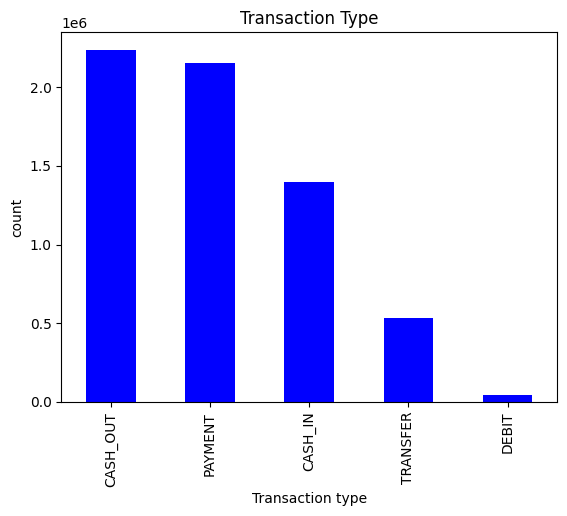

In [19]:
df['type'].value_counts().plot(kind='bar', title='Transaction Type', color='blue')
plt.xlabel('Transaction type')
plt.ylabel('count')
plt.show()

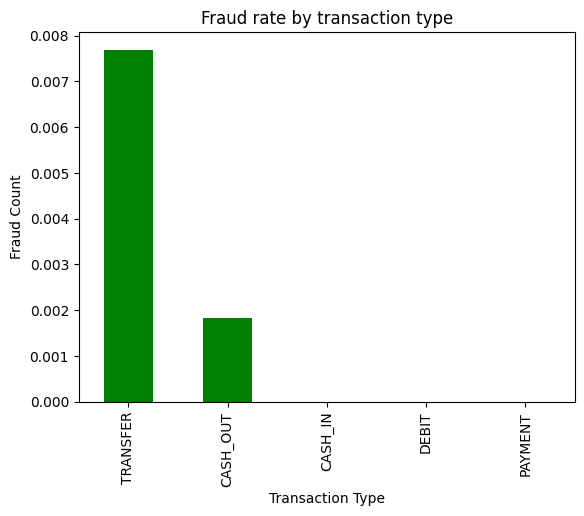

In [20]:
fraud_rate = df.groupby('type')['isFraud'].mean().sort_values(ascending=False)
fraud_rate.plot(kind='bar', title='Fraud rate by transaction type', color='green')
plt.xlabel('Transaction Type')
plt.ylabel('Fraud Count')
plt.show()

In [22]:
df['amount'].describe().astype(int)

,amount
count,6362620
mean,179861
std,603858
min,0
25%,13389
50%,74871
75%,208721
max,92445516


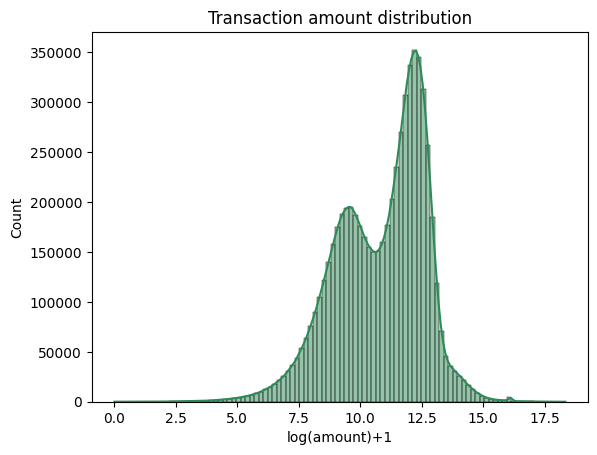

In [23]:
sns.histplot(np.log1p(df['amount']), bins=100, kde=True, color='seagreen')
plt.title('Transaction amount distribution')
plt.xlabel('log(amount)+1')
plt.show()

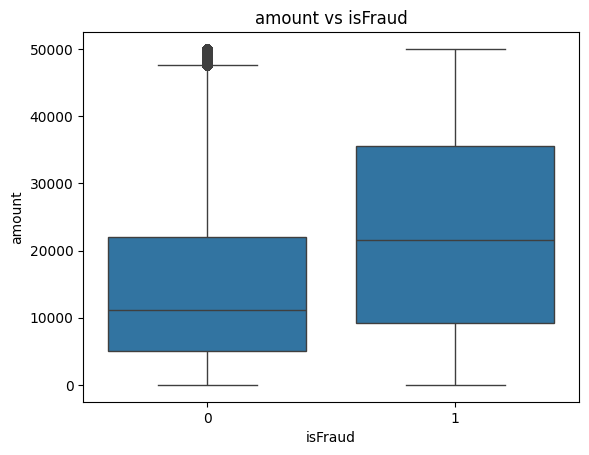

In [24]:
sns.boxplot(data=df[df['amount']<50000],x='isFraud', y='amount')
plt.title('amount vs isFraud')
plt.show()

In [25]:
df['BalanceDiffOrg']=df['oldbalanceOrg']-df['newbalanceOrig']
df['BalanceDiffDest']=df['newbalanceDest']-df['oldbalanceDest']

In [26]:
(df['BalanceDiffOrg']<0).sum()

np.int64(1399253)

In [27]:
(df['BalanceDiffDest']<0).sum()

np.int64(1238864)

/tmp/ipython-input-1186381444.py:2: MatplotlibDeprecationWarning: Passing label as a length 741 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(fraud_by_step.index, fraud_by_step.values, label = fraud_by_step)


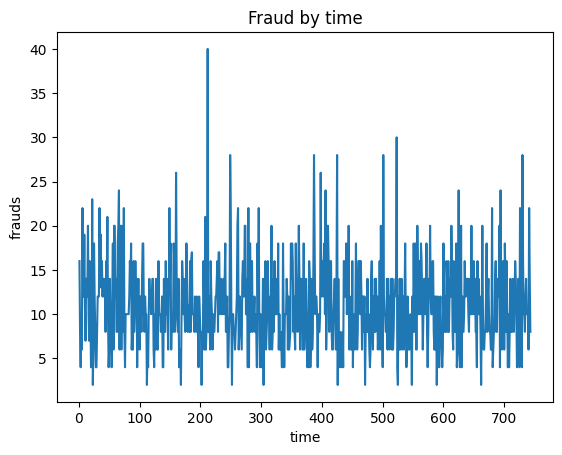

In [29]:
fraud_by_step = df[df['isFraud']==1]['step'].value_counts().sort_index()
plt.plot(fraud_by_step.index, fraud_by_step.values, label = fraud_by_step)
plt.title('Fraud by time')
plt.xlabel('time')
plt.ylabel('frauds')
plt.show()

In [30]:
df.drop(columns='step', inplace=True)

In [31]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,BalanceDiffOrg,BalanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [32]:
top_givers = df['nameOrig'].value_counts().head(10)
top_givers

,count
nameOrig,
C1530544995,3
C545315117,3
C724452879,3
C1784010646,3
C1677795071,3
C1462946854,3
C1065307291,3
C1999539787,3
C2098525306,3


In [33]:
top_recipients = df['nameDest'].value_counts().head(10)
top_recipients

,count
nameDest,
C1286084959,113
C985934102,109
C665576141,105
C2083562754,102
C248609774,101
C1590550415,101
C1789550256,99
C451111351,99
C1360767589,98


In [34]:
fraud_cust = df[df['isFraud']==1]['nameOrig'].value_counts().head(10)

In [35]:
fraud_cust

,count
nameOrig,
C1280323807,1
C1305486145,1
C840083671,1
C1420196421,1
C2101527076,1
C1039979813,1
C2089752665,1
C1614818636,1
C40604503,1


In [36]:
fraud_trans = df[df['type'].isin(['TRANSFER','CASH_OUT'])]

In [37]:
fraud_trans['type'].value_counts()

,count
type,
CASH_OUT,2237500
TRANSFER,532909


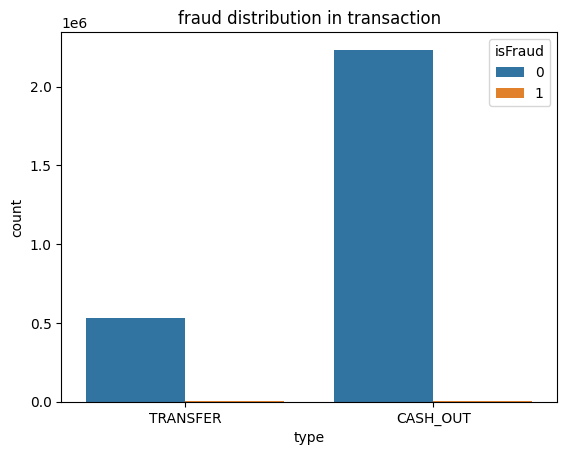

In [38]:
sns.countplot(data=fraud_trans, hue='isFraud', x='type')
plt.title('fraud distribution in transaction')
plt.show()

In [41]:
corr = df[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud']].corr()

In [42]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


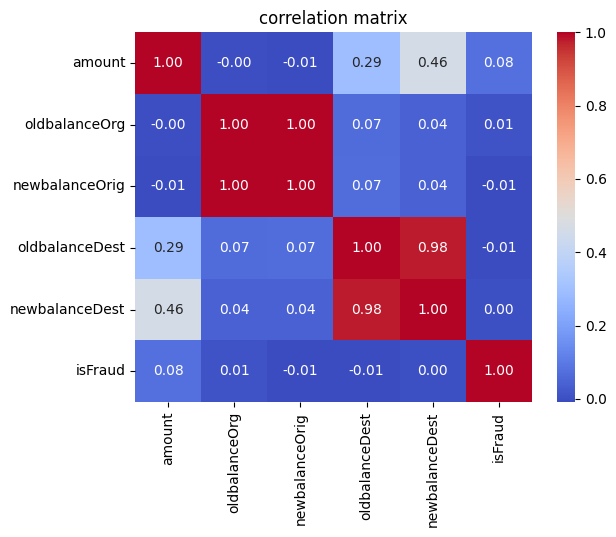

In [44]:
sns.heatmap(corr, cmap='coolwarm',annot=True, fmt='.2f')
plt.title('correlation matrix')
plt.show()

In [45]:
zero = df[
    (df['oldbalanceOrg']>0) &
    (df['newbalanceOrig']==0) &
    (df['type'].isin(['TRANSFER','CASH_OUT']))
]

In [47]:
len(zero)

1188074

In [48]:
zero.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,BalanceDiffOrg,BalanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,2712905.89


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [50]:
modelDF = df.drop(['isFlaggedFraud', 'nameOrig','nameDest'], axis=1)

In [52]:
modelDF.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,BalanceDiffOrg,BalanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,-21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [53]:
categorical=['type']
numeric=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

In [55]:
y=modelDF['isFraud']
X=modelDF.drop('isFraud', axis=1)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [57]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric),
        ('cat', OneHotEncoder(drop='first'), categorical)
    ],
    remainder='drop'
)

In [59]:
pipeline=Pipeline([
    ('prep',preprocessor),
    ('clf',LogisticRegression(class_weight='balanced', max_iter=1000))
])

In [60]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [61]:
y_pred = pipeline.predict(X_test)

In [62]:
y_pred

array([0, 0, 1, ..., 1, 0, 0])

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97   1906322
           1       0.02      0.95      0.04      2464

    accuracy                           0.94   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.94      0.97   1908786



In [64]:
confusion_matrix(y_test, y_pred)

array([[1799079,  107243],
       [    133,    2331]])

In [65]:
pipeline.score(X_test, y_test)

0.9437464440749251